In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import List, Tuple

# Excercise 1

Task - type of learning
* Identification of products frequently bought together - unsupervised
* Chess computer capable of learning from previous games - reinforcement
* Spam recognition and filtering - supervised
* Classification of applicants as credit-worthy or unworthy - supervised
* Object recognition in computer vision - supervised
* Obstacle avoidance in robotics - reinforcement
* Automatic sorting of images wrt the depicted objects - unsupervised

# Excercise 2

**Load and describe the dataset**

In [2]:
dataset: pd.DataFrame = pd.read_csv('data/breast-cancer-wisconsin.data.txt')

In [4]:
dataset.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
dataset.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Drop id, non-numeric and missing values** 

In [8]:
dataset = dataset.dropna().select_dtypes(['number']).drop(['id'], 'columns')

In [9]:
dataset.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Standarize the features (min-max)**

In [12]:
dataset['class'] = dataset['class'].apply(lambda x: x/2 -1)

In [13]:
dataset -= dataset.min()
dataset /= dataset.max()

In [16]:
dataset.tail()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.0
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.0
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.777778,1.000000,0.111111,1.0
697,0.333333,0.777778,0.555556,0.333333,0.222222,1.000000,0.555556,0.000000,1.0
698,0.333333,0.777778,0.777778,0.444444,0.333333,1.000000,0.333333,0.000000,1.0


**Prepare training and test data (class distribution will be equal in both sets thanks to stratifying)**

In [18]:
y = dataset['class']
X = dataset.drop(['class'], 'columns')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)

# Excercise 3

**Load the regression data**

In [26]:
regression_data = pd.read_csv('data/GD_Example.txt', sep=' ', names=['x', 'y'])

In [27]:
regression_data.head()

,x,y
0,4.526421,5.765206
1,3.998887,5.602163
2,5.717843,6.894751
3,5.528432,6.681258
4,4.241833,5.186559


**Plot the points**

In [28]:
from matplotlib import pyplot as plt

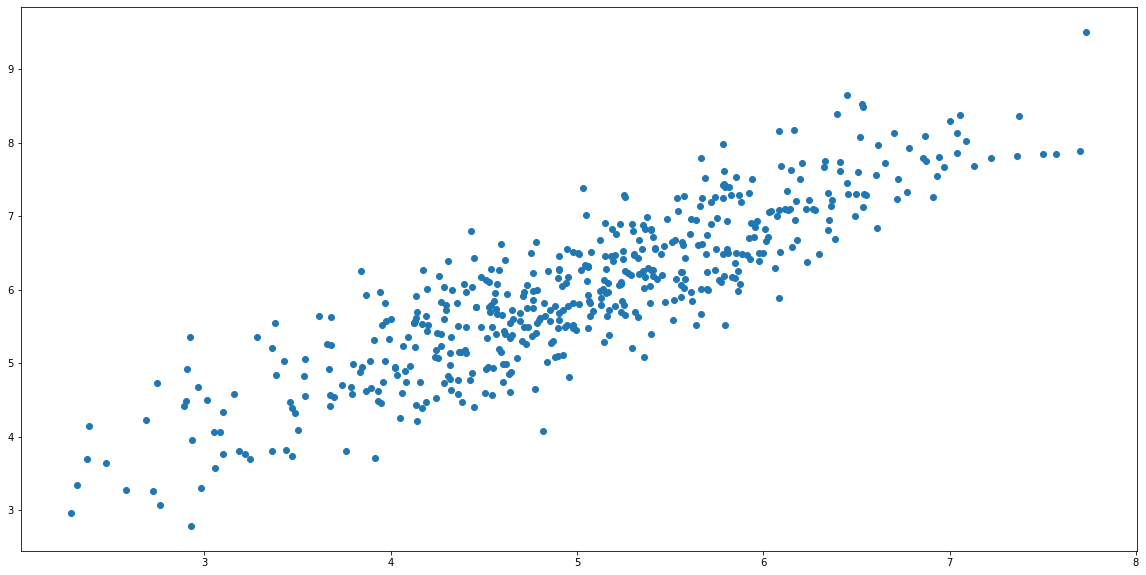

In [31]:
plt.figure(figsize=(20,10))
plt.plot(regression_data['x'], regression_data['y'], 'o')
plt.show()

**Gradient descent**

In [33]:
def cost(X: List[float], Y: List[float], m: float, b: float) -> float:
    result = 0f
    for x,y in zip(X, Y):
        result += (y - m*x - b) ** 2
    return result / len(X)

In [52]:
def m_derivative(X: List[float], Y: List[float], m: float, b: float) -> float:
    result = 0
    for x,y in zip(X, Y):
        result -= 2 * x * (y - m*x - b)
    return result / len(X) if len(X) > 0 else 0
    
    
def b_derivative(X: List[float], Y: List[float], m: float, b: float) -> float:
    result = 0
    for x,y in zip(X, Y):
        result -= 2 * (y - m*x - b)
    return result / len(X) if len(X) > 0 else 0

In [85]:
def train_regression_sgd(X: List[float], Y: List[float], learning_rate=.01, batch_size=10) -> Tuple[float, float]:
    m, b = np.random.randn(), np.random.randn()
    print('Initial random values for m,b:', m, b)
    n_iterations = int(len(X) / batch_size) + 1
    for i in range(n_iterations):
        x = X[i*batch_size:(i+1) * batch_size] 
        y = Y[i*batch_size:(i+1) * batch_size] 
        m -= m_derivative(x, y, m, b) * learning_rate
        b -= b_derivative(x, y, m, b) * learning_rate
    print('Values after training m,b:', m, b)
    return m, b

In [93]:
m, b = train_regression_sgd(regression_data['x'], regression_data['y'], batch_size=4, learning_rate=.01)

Initial random values for m,b: 0.6251215133721123 0.06371166182806781
Values after training m,b: 1.1275135094392377 0.2297635546803629


**Plot the training results**

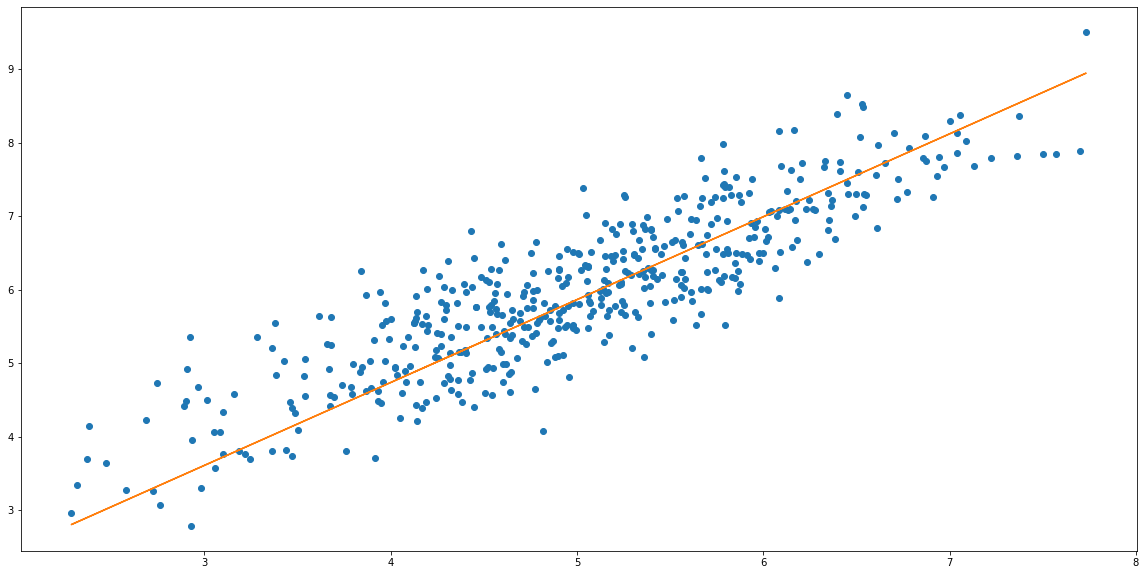

In [94]:
plt.figure(figsize=(20,10))
plt.plot(regression_data['x'], regression_data['y'], 'o')
plt.plot(regression_data['x'], regression_data['x'].apply(lambda x: x * m + b), '-')
plt.show()